In [2]:
from PIL import Image
import cv2
from pathlib import Path
from IPython import display
import matplotlib.pyplot as plt

In [3]:
DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [4]:
path_image = Path("./Van-willem-vincent-gogh-die-kartoffelesser-03850.jpg")
path_image.exists()

True

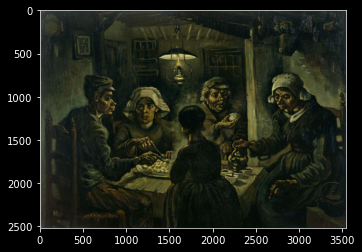

In [5]:
image_PIL = Image.open(path_image)
plt.imshow(image_PIL);

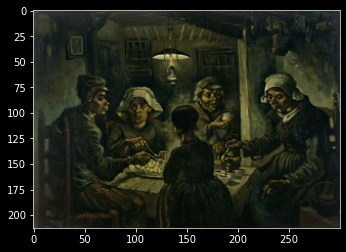

In [6]:
w_dst = 300
w_PIL, h_PIL = image_PIL.size
h_dst = int(w_dst * (h_PIL / w_PIL))
image_PIL_resized = image_PIL.resize((w_dst, h_dst))
plt.imshow(image_PIL_resized);

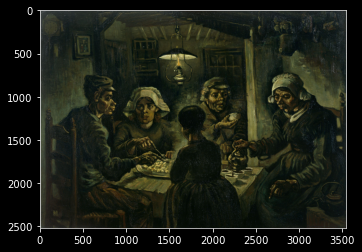

In [7]:
image_cv2 = cv2.imread(str(path_image))
plt.imshow(image_cv2[..., ::-1]);

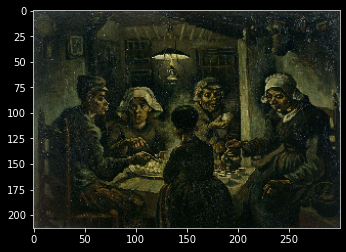

In [8]:
w_dst = 300
h_cv2, w_cv2 = image_cv2.shape[:2]
h_dst = int(w_dst * (h_cv2 / w_cv2))
image_cv2_resized = cv2.resize(image_cv2, (w_dst, h_dst))
# image_cv2_resized = cv2.resize(image_cv2,
#                                 (w_dst, h_dst),
#                                 interpolation=cv2.INTER_CUBIC)
plt.imshow(image_cv2_resized[..., ::-1]);

## Compare Speed
- only resize
- read and resize

In [15]:
%%timeit
w_dst = 300
w_PIL, h_PIL = image_PIL.size
h_dst = int(w_dst * (h_PIL / w_PIL))
image_PIL_resized = image_PIL.resize((w_dst, h_dst))

95 ms ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
w_dst = 300
h_cv2, w_cv2 = image_cv2.shape[:2]
h_dst = int(w_dst * (h_cv2 / w_cv2))
image_cv2_resized = cv2.resize(image_cv2, (w_dst, h_dst))

1.14 ms ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
image_PIL = Image.open(path_image)
w_dst = 300
w_PIL, h_PIL = image_PIL.size
h_dst = int(w_dst * (h_PIL / w_PIL))
image_PIL_resized = image_PIL.resize((w_dst, h_dst))

330 ms ± 26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
image_cv2 = cv2.imread(str(path_image))
w_dst = 300
h_cv2, w_cv2 = image_cv2.shape[:2]
h_dst = int(w_dst * (h_cv2 / w_cv2))
image_cv2_resized = cv2.resize(image_cv2, (w_dst, h_dst))

287 ms ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
